In [2]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

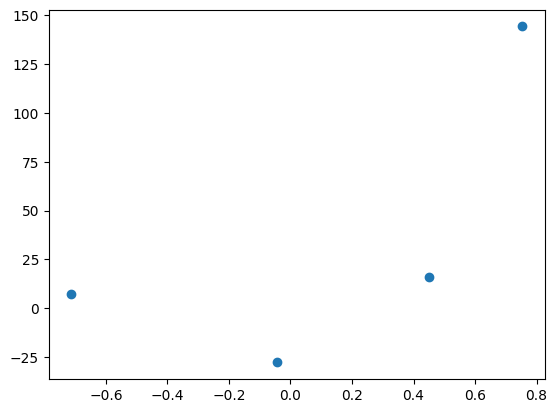

In [4]:
plt.scatter(X, y)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression()
reg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# m
reg.coef_

array([78.35063668])

In [8]:
# b
reg.intercept_

np.float64(26.15963284313262)

#### Regression Line

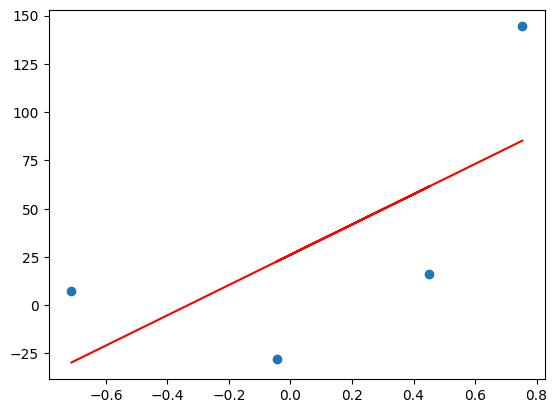

In [9]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color="red")

#### Lets apply gradient descent assuming the slope(reg.coef_) is a constant
#### and lets assume the starting value for $b$ intercept is $b = 0$
#### and then by applying gradient descent we have to make $b = $ actual $b$ i.e (reg.intercept_)

In [10]:
y_pred = ((reg.coef_ * X) + 0).reshape(4)

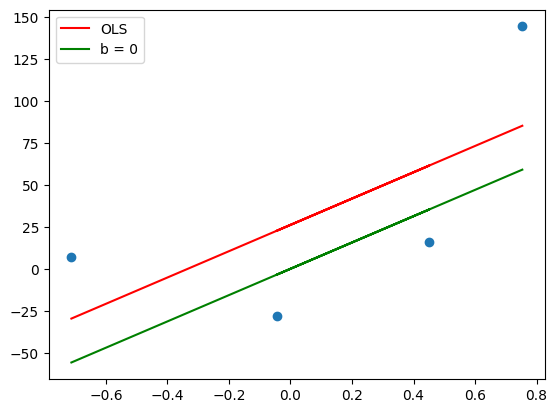

In [11]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color="red", label="OLS")
plt.plot(X, y_pred, color="green", label="b = 0")
plt.legend()
plt.show()

#### Now we have to apply gradient descent and we will see the green line moving towards the red line i.e b will eventually become the actual $b$ (reg.coef_) from $0$

### Iteration 1

In [12]:
m = reg.coef_
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
print(loss_slope)

-209.27706274506096


#### Learning rate

In [13]:
lrate = 0.1

In [14]:
step_size = loss_slope * lrate
print(step_size)

-20.927706274506097


#### Calculating the new intercept

In [15]:
b = b - step_size
print(b)

20.927706274506097


#### Now we got a new b. Lets make y for it so that we can plot the graph

In [16]:
y_pred1 = ((reg.coef_ * X) + b).reshape(4)

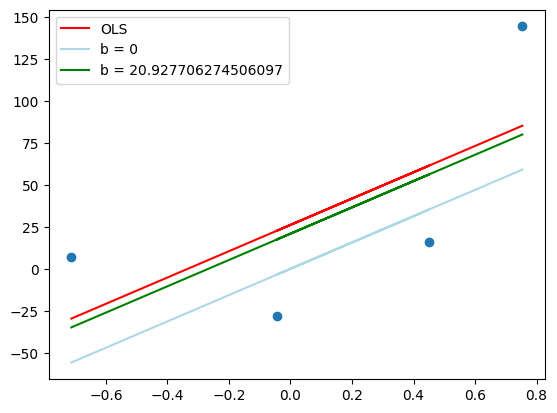

In [17]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color="red", label="OLS")
plt.plot(X, y_pred, color="lightblue", label="b = 0")
plt.plot(X, y_pred1, color="green", label="b = {}".format(b))
plt.legend()
plt.show()

#### Look it got closer

### Iteration 2

In [18]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b) # this b is the new b 
print(loss_slope)

-41.855412549012215


In [19]:
step_size = loss_slope * lrate
print(step_size)

-4.185541254901222


#### New intercept / New b

In [20]:
b = b - step_size
print(b)

25.113247529407317


Look we are getting closer to actual $b (26.15)$

In [21]:
y_pred2 = ((reg.coef_) * X + b).reshape(4)

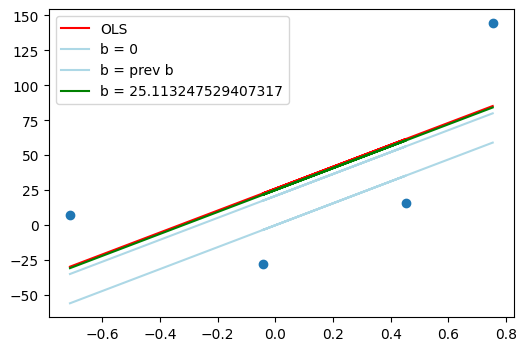

In [22]:
plt.figure(figsize=(6, 4))
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color="red", label="OLS")
plt.plot(X, y_pred, color="lightblue", label="b = 0")
plt.plot(X, y_pred1, color="lightblue", label="b = prev b")
plt.plot(X, y_pred2, color="green", label="b = {}".format(b))
plt.legend()
plt.show()

### Iteration 3

In [23]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b) # this b is the new b 
print(loss_slope)

-8.371082509802434


In [24]:
step_size = loss_slope * lrate
print(step_size)

-0.8371082509802434


In [25]:
b = b - step_size
print(b)

25.95035578038756


In [26]:
y_pred3 = ((reg.coef_) * X + b).reshape(4)

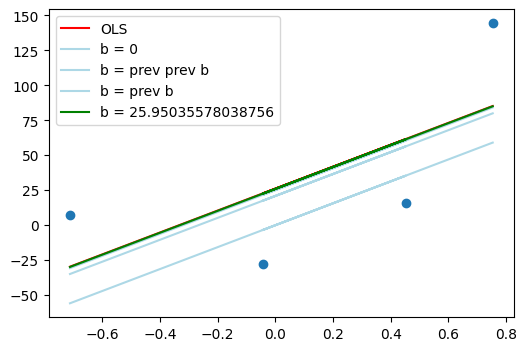

In [27]:
plt.figure(figsize=(6, 4))
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color="red", label="OLS")
plt.plot(X, y_pred, color="lightblue", label="b = 0")
plt.plot(X, y_pred1, color="lightblue", label="b = prev prev b")
plt.plot(X, y_pred2, color="lightblue", label="b = prev b")
plt.plot(X, y_pred3, color="green", label="b = {}".format(b))
plt.legend()
plt.show()

### We can create a class too for these iteration

In [37]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = reg.coef_
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        # calculate new b values
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
        print("new b value =", self.b)

#### 2 iterations i.e 2 epochs

In [38]:
gd = GDRegressor(0.1, 2)

In [39]:
gd.fit(X, y)

new b value = 25.113247529407317


#### 3 iterations i.e 3 epochs

In [41]:
gd = GDRegressor(0.1, 3)
gd.fit(X, y)

new b value = 25.95035578038756
